In [1]:
#Chapter 2
# a.join(b)是指a加入b，即b(i)+a
print( '\n'
       .join([' '.join(['%s*%s=%-2s' % (y,x,x*y) for  y
                            in  range(1,x+1)])for  x in range(1,10)]))

1*1=1 
1*2=2  2*2=4 
1*3=3  2*3=6  3*3=9 
1*4=4  2*4=8  3*4=12 4*4=16
1*5=5  2*5=10 3*5=15 4*5=20 5*5=25
1*6=6  2*6=12 3*6=18 4*6=24 5*6=30 6*6=36
1*7=7  2*7=14 3*7=21 4*7=28 5*7=35 6*7=42 7*7=49
1*8=8  2*8=16 3*8=24 4*8=32 5*8=40 6*8=48 7*8=56 8*8=64
1*9=9  2*9=18 3*9=27 4*9=36 5*9=45 6*9=54 7*9=63 8*9=72 9*9=81


In [2]:
#设置库文件
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#设置路径
housing_url='https://github.com/jaykwok/handson-ml2/raw/master/datasets/housing/housing.tgz'
housing_path=os.path.join('practice',housing_url.split('/')[-3],housing_url.split('/')[-2])
#创建存放文件路径
os.makedirs(housing_path,exist_ok=True)

In [4]:
#设置下载并解压的函数
def fetch_housing_data(url=housing_url,path=housing_path):
    os.makedirs(path,exist_ok=True)
    file_path=path+url.split('/')[-1]
    urllib.request.urlretrieve(url,file_path)
    housing_tgz=tarfile.open(file_path)
    housing_tgz.extractall(path)
    housing_tgz.close()

#下载并解压数据集文件
fetch_housing_data()

In [5]:
#读取数据集

file_path=os.path.join(housing_path,'housing.csv')
data=pd.read_csv(file_path)

In [6]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


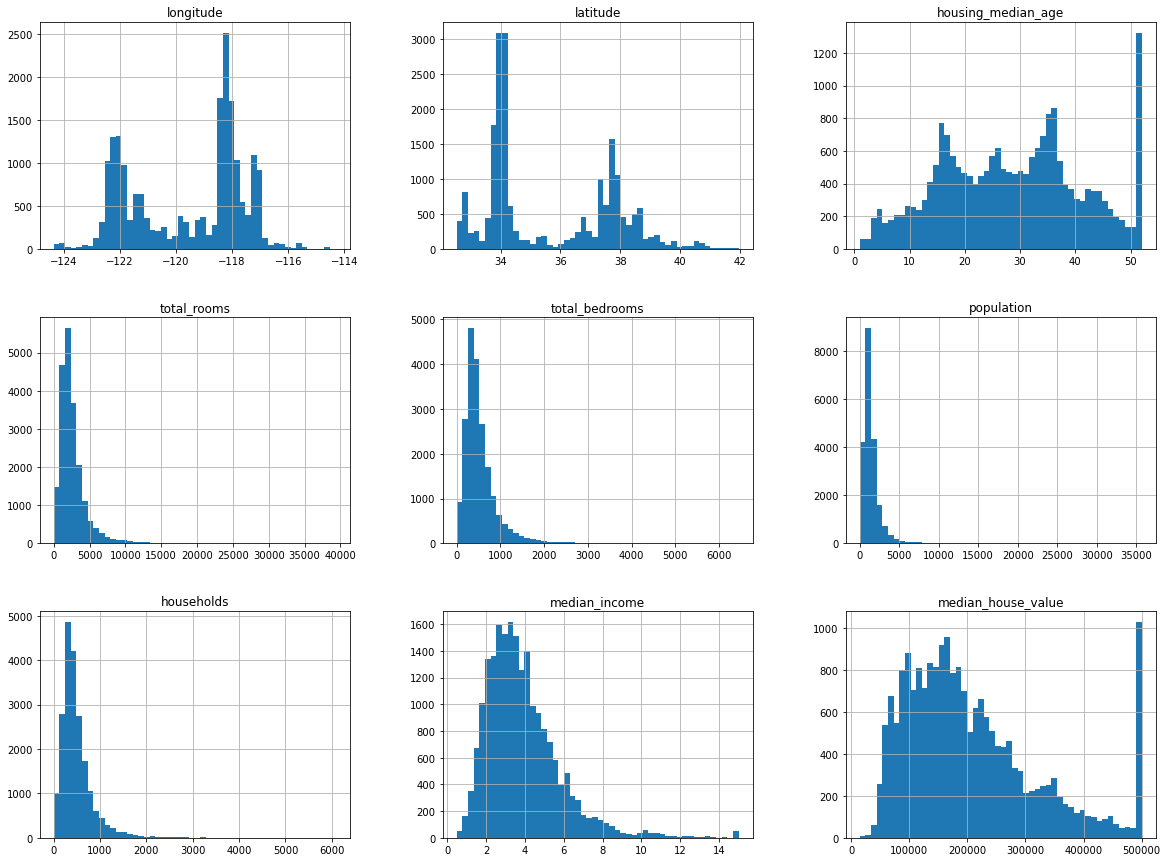

In [7]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
#纯随机抽样划分测试集
from sklearn.model_selection import train_test_split

[train_set,test_set]=train_test_split(data,test_size=0.2,random_state=0)
data['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

<AxesSubplot:>

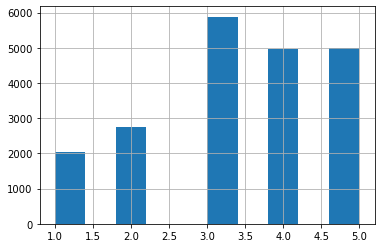

In [9]:
data['income_cat']=pd.cut(data['median_income'],bins=[0,1.9,2.5,3.6,4.8,np.inf],labels=[1,2,3,4,5])
data['income_cat'].hist()

In [10]:
#分层抽样(stratified:分层的）

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)

for train_index,test_index in split.split(data,data['income_cat']):
    stratified_train_set=data.loc[train_index]
    stratified_test_set=data.loc[test_index]

In [11]:
#查看分层抽样属性
print(data['income_cat'].value_counts()/len(data))
print(stratified_train_set['income_cat'].value_counts()/len(stratified_train_set))
print(stratified_test_set['income_cat'].value_counts()/len(stratified_test_set))

3    0.285029
5    0.242200
4    0.239971
2    0.133624
1    0.099176
Name: income_cat, dtype: float64
3    0.285005
5    0.242188
4    0.240007
2    0.133600
1    0.099201
Name: income_cat, dtype: float64
3    0.285126
5    0.242248
4    0.239826
2    0.133721
1    0.099079
Name: income_cat, dtype: float64


In [12]:
#删除income_cat属性，因为分层抽样完了
for sets in (stratified_train_set,stratified_test_set):

    #inplace（在体内），即直接在本体上操作而非创建一个拷贝的临时变量从而需要手动去指定位置
    sets.drop(columns=['income_cat'],inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

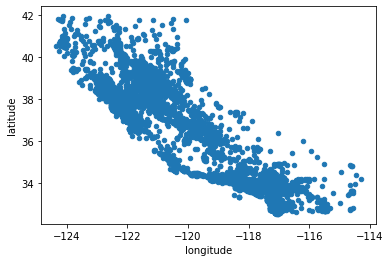

In [13]:
#未设置alpha透明度度时候
copycat=stratified_train_set.copy()
copycat.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

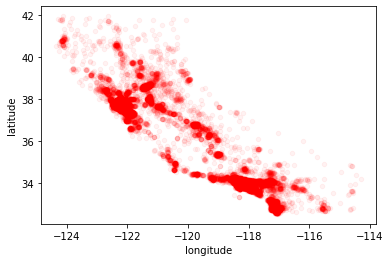

In [14]:
#设置透明度的时候
copycat.plot(kind='scatter',x='longitude',y='latitude',alpha=0.05,color='red')

<function matplotlib.pyplot.legend(*args, **kwargs)>

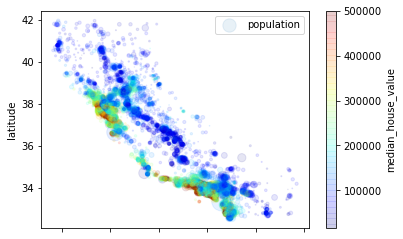

In [15]:
#加入散点的size和colorbar属性
copycat.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,s=copycat['population']/100,label='population',c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend

In [16]:
#查看相关系数
copycat.corr()['median_house_value']

longitude            -0.047371
latitude             -0.142698
housing_median_age    0.103805
total_rooms           0.134189
total_bedrooms        0.048049
population           -0.024877
households            0.064523
median_income         0.689636
median_house_value    1.000000
Name: median_house_value, dtype: float64